# Author : Muhammad Tallal Habib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as ply

### Data Pre-processing 

In [2]:
appdata=pd.read_csv('AppleStore.csv')

In [3]:
appdata.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

#### As data contains two trends for analysis i-e ratings for current version and other for all released versions, I will explore the current version and its rating trend. 

In [4]:
appdata.drop('Unnamed: 0',axis=1)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [5]:
appdata=appdata.drop(['Unnamed: 0','vpp_lic','currency'],axis=1)

In [6]:
appdata

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45
5,283619399,Shanghai Mahjong,10485713,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1
6,283646709,PayPal - Send and request money safely,227795968,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19
7,284035177,Pandora - Music & Radio,130242560,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1
8,284666222,PCalc - The Best Calculator,49250304,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1
9,284736660,Ms. PAC-MAN,70023168,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10


In [7]:
appdata['Size_GB']=appdata['size_bytes']/(1024*1024)

In [8]:
appdata

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,Size_GB
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,96.119141
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,122.558594
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,88.476562
5,283619399,Shanghai Mahjong,10485713,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,9.999955
6,283646709,PayPal - Send and request money safely,227795968,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,217.243164
7,284035177,Pandora - Music & Radio,130242560,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,124.208984
8,284666222,PCalc - The Best Calculator,49250304,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,46.968750
9,284736660,Ms. PAC-MAN,70023168,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,66.779297


In [9]:
appdata.rename(columns={'track_name':'app_name','cont_rating':'content_rate',
                        'prime_genre':'genre','rating_count_tot':'versions_rating',
                       'rating_count_ver':'version_rating','sup_devices.num':'supp_devices','ipadSc_urls.num':'screen_shots_displayed',
                       'lang.num':'supp_lang_num'},inplace=True)

In [10]:
appdata

,id,app_name,size_bytes,price,versions_rating,version_rating,user_rating,user_rating_ver,ver,content_rate,genre,supp_devices,screen_shots_displayed,supp_lang_num,Size_GB
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,96.119141
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,122.558594
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,88.476562
5,283619399,Shanghai Mahjong,10485713,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,9.999955
6,283646709,PayPal - Send and request money safely,227795968,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,217.243164
7,284035177,Pandora - Music & Radio,130242560,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,124.208984
8,284666222,PCalc - The Best Calculator,49250304,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,46.968750
9,284736660,Ms. PAC-MAN,70023168,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,66.779297


### DATA CLEANING

In [11]:
appdata=appdata.loc[:,['app_name','genre','user_rating_ver','version_rating','price','supp_devices','screen_shots_displayed','size_bytes']]

In [12]:
appdata

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
0,PAC-MAN Premium,Games,4.5,26,3.99,38,5,100788224
1,Evernote - stay organized,Productivity,3.5,26,0.00,37,5,158578688
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",Weather,4.5,2822,0.00,37,5,100524032
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",Shopping,4.5,649,0.00,37,5,128512000
4,Bible,Reference,5.0,5320,0.00,37,5,92774400
5,Shanghai Mahjong,Games,4.0,5516,0.99,47,5,10485713
6,PayPal - Send and request money safely,Finance,4.5,879,0.00,37,0,227795968
7,Pandora - Music & Radio,Music,4.5,3594,0.00,37,4,130242560
8,PCalc - The Best Calculator,Utilities,5.0,4,9.99,37,5,49250304
9,Ms. PAC-MAN,Games,4.0,40,3.99,38,0,70023168


In [13]:
appdata.head()

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
0,PAC-MAN Premium,Games,4.5,26,3.99,38,5,100788224
1,Evernote - stay organized,Productivity,3.5,26,0.00,37,5,158578688
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",Weather,4.5,2822,0.00,37,5,100524032
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",Shopping,4.5,649,0.00,37,5,128512000
4,Bible,Reference,5.0,5320,0.00,37,5,92774400


In [14]:
appdata=appdata.sort_values(by=['user_rating_ver','version_rating'],ascending=False)

In [15]:
appdata.head(10)

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
498,Infinity Blade,Games,5.0,177050,0.99,43,5,624107810
545,"Zappos: shop shoes & clothes, fast free shipping",Shopping,5.0,39452,0.00,37,4,70325248
479,shopkick - Shopping Rewards & Discounts,Shopping,5.0,29363,0.00,37,4,74822656
3616,Browser and File Manager for Documents,Utilities,5.0,27213,0.00,37,4,42198016
2989,The Room Three,Games,5.0,21769,4.99,39,5,1005560832
6688,Tricky Test 2™: Genius Brain?,Games,5.0,19952,0.00,38,5,134669312
384,▻Sudoku,Games,5.0,17119,0.00,40,5,71002112
3067,AdVenture Capitalist,Games,5.0,11269,0.00,38,5,292289536
3643,Block Craft 3D: Building Simulator Game For Free,Games,5.0,11001,0.00,37,5,93063168
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,10332,0.00,40,5,157851648


#### Top paid Apps

In [16]:
paidapps=appdata[appdata['price']>0.0]

In [17]:
paidapps.count()

app_name                  3141
genre                     3141
user_rating_ver           3141
version_rating            3141
price                     3141
supp_devices              3141
screen_shots_displayed    3141
size_bytes                3141
dtype: int64

In [18]:
paidapps=paidapps.sort_values(by=['price'],ascending=False)

In [19]:
paidapps.head()

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
1479,LAMP Words For Life,Education,0.0,0,299.99,24,5,583263232
115,Proloquo2Go - Symbol-based AAC,Education,3.5,10,249.99,37,5,723764224
2568,KNFB Reader,Productivity,0.0,0,99.99,37,5,106429440
162,NAVIGON Europe,Navigation,2.5,3,74.99,37,2,144412672
1136,Articulation Station Pro,Education,5.0,130,59.99,38,5,425919488


### Paid Apps by Category 

In [20]:
paid_apps=paidapps.groupby(['genre']).count()

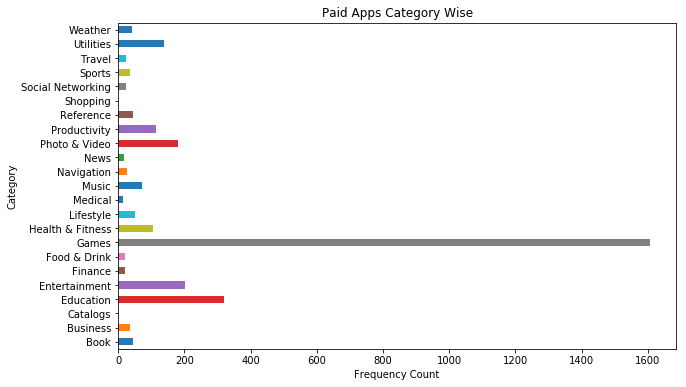

In [21]:
paid_apps['app_name'].plot(kind='barh',
                          figsize=(10,6),
                          alpha=0.98)
plt.xlabel('Frequency Count')
plt.ylabel('Category')
plt.title('Paid Apps Category Wise')
plt.show()

### To find the ratings of the apps related to games

In [22]:
games=appdata.loc[appdata['genre']=='Games']

In [23]:
games

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
498,Infinity Blade,Games,5.0,177050,0.99,43,5,624107810
2989,The Room Three,Games,5.0,21769,4.99,39,5,1005560832
6688,Tricky Test 2™: Genius Brain?,Games,5.0,19952,0.00,38,5,134669312
384,▻Sudoku,Games,5.0,17119,0.00,40,5,71002112
3067,AdVenture Capitalist,Games,5.0,11269,0.00,38,5,292289536
3643,Block Craft 3D: Building Simulator Game For Free,Games,5.0,11001,0.00,37,5,93063168
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,10332,0.00,40,5,157851648
3180,Tap Titans,Games,5.0,8763,0.00,43,5,393954304
1104,Head Soccer,Games,5.0,8518,0.00,40,4,121319424
3784,"Egg, Inc.",Games,5.0,8442,0.00,38,4,53579776


In [24]:
gamesapps=games.groupby(['user_rating_ver']).count()

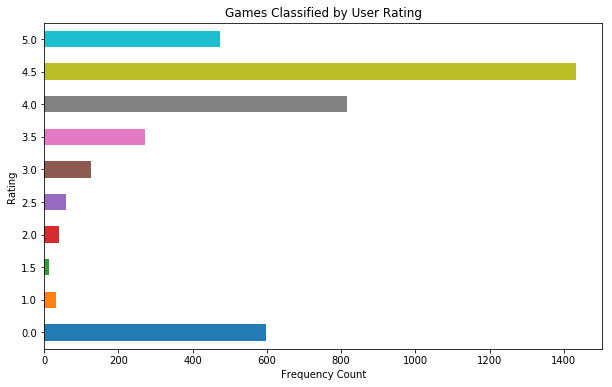

In [25]:
gamesapps['app_name'].plot(kind='barh',
                          figsize=(10,6),
                          alpha=0.98)
plt.xlabel('Frequency Count')
plt.ylabel('Rating')
plt.title('Games Classified by User Rating')
plt.show()

### Here we will find the the mostly used category of Apps which were rated five star by both Parametres i-e (Paid & free) 

In [26]:
top_rated=appdata.loc[appdata['user_rating_ver']==5.0]
top_rated

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
498,Infinity Blade,Games,5.0,177050,0.99,43,5,624107810
545,"Zappos: shop shoes & clothes, fast free shipping",Shopping,5.0,39452,0.00,37,4,70325248
479,shopkick - Shopping Rewards & Discounts,Shopping,5.0,29363,0.00,37,4,74822656
3616,Browser and File Manager for Documents,Utilities,5.0,27213,0.00,37,4,42198016
2989,The Room Three,Games,5.0,21769,4.99,39,5,1005560832
6688,Tricky Test 2™: Genius Brain?,Games,5.0,19952,0.00,38,5,134669312
384,▻Sudoku,Games,5.0,17119,0.00,40,5,71002112
3067,AdVenture Capitalist,Games,5.0,11269,0.00,38,5,292289536
3643,Block Craft 3D: Building Simulator Game For Free,Games,5.0,11001,0.00,37,5,93063168
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,10332,0.00,40,5,157851648


In [27]:
paid_apps=top_rated[top_rated['price']>0]
rated_paid_apps=paid_apps.sort_values('version_rating',ascending=False)
top_rated_paid_apps=rated_paid_apps.groupby(by='genre').count()
top_rated_paid_apps=top_rated_paid_apps['app_name']
top_rated_paid_apps

genre
Book                   9
Business              12
Catalogs               1
Education             35
Entertainment         28
Finance                4
Games                217
Health & Fitness      21
Lifestyle              8
Medical                3
Music                 17
Navigation             1
News                   1
Photo & Video         41
Productivity          19
Reference              7
Shopping               1
Social Networking      5
Sports                 9
Travel                10
Utilities             15
Weather                9
Name: app_name, dtype: int64

In [28]:
free_apps=top_rated[top_rated['price']==0.0]
rated_free_apps=free_apps.sort_values('version_rating',ascending=False)
top_rated_free_apps=rated_free_apps.groupby(by='genre').count()
top_rated_free_apps=top_rated_free_apps['app_name']
top_rated_free_apps

genre
Book                   7
Business               2
Catalogs               2
Education             13
Entertainment         26
Finance                8
Food & Drink           8
Games                258
Health & Fitness      19
Lifestyle              6
Medical                4
Music                 10
Navigation             1
News                   8
Photo & Video         36
Productivity          12
Reference              3
Shopping              20
Social Networking     13
Sports                 8
Travel                 7
Utilities             17
Weather                3
Name: app_name, dtype: int64

In [29]:
genre=np.unique(appdata['genre'])
genre

array(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment',
       'Finance', 'Food & Drink', 'Games', 'Health & Fitness',
       'Lifestyle', 'Medical', 'Music', 'Navigation', 'News',
       'Photo & Video', 'Productivity', 'Reference', 'Shopping',
       'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'],
      dtype=object)

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=genre,
    y=top_rated_free_apps,
    name='Top Rated Free Apps',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=genre,
    y=top_rated_paid_apps,
    name='Top Rated Paid Apps',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [40]:
frame={'top_rated_free':top_rated_free_apps,'top_rated_paid':top_rated_paid_apps}

In [42]:
combined=pd.DataFrame(frame,index=genre)

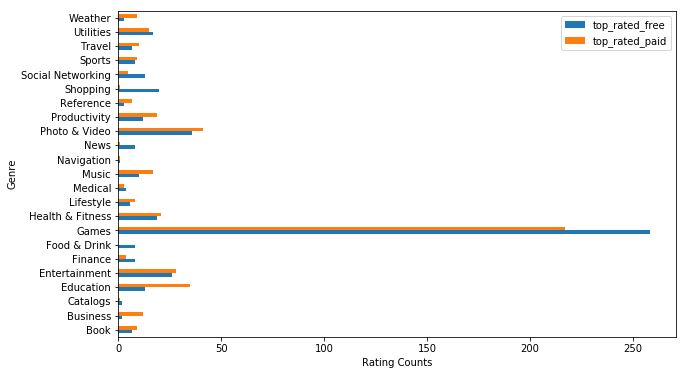

In [49]:
combined.plot(kind='barh',
             figsize=(10,6))
plt.xlabel('Rating Counts')
plt.ylabel('Genre')
plt.show()

### As majority of games were rated 4.5 star let's explore them

In [31]:
four_rated=games.loc[games.user_rating_ver==4.5]

In [32]:
four_rated

,app_name,genre,user_rating_ver,version_rating,price,supp_devices,screen_shots_displayed,size_bytes
4467,Geometry Dash Meltdown,Games,4.5,117470,0.00,40,5,55445504
1780,Real Basketball,Games,4.5,94315,0.00,43,5,70336512
1182,Clear Vision (17+),Games,4.5,69225,0.99,43,5,37879808
1361,Trigger Fist,Games,4.5,58269,0.00,43,5,144196155
1465,Slayin,Games,4.5,34080,0.99,43,5,22982656
5346,Stack,Games,4.5,28389,0.00,40,5,115195904
2937,Five Nights at Freddy's,Games,4.5,27388,2.99,43,5,49946624
3031,N.O.V.A. 3: Freedom Edition - Near Orbit Vangu...,Games,4.5,25716,0.00,43,5,1400971264
6222,Bowmasters - Top Multiplayer Bowman Archery Game,Games,4.5,24387,0.00,37,5,164000768
1615,Beat the Boss 2,Games,4.5,22708,0.00,43,5,205271040


In [35]:
four_paid_apps=four_rated[four_rated['price']>0]
four_rated_paid_apps=four_paid_apps.sort_values('version_rating',ascending=False)
four_rated_paid_apps=four_rated_paid_apps.groupby(by='genre').count()
four_rated_paid_apps=four_rated_paid_apps['app_name']
four_rated_paid_apps

genre
Games    606
Name: app_name, dtype: int64

In [36]:
four_free_apps=four_rated[four_rated['price']==0.0]
four_rated_free_apps=four_free_apps.sort_values('version_rating',ascending=False)
four_rated_free_apps=four_rated_free_apps.groupby(by='genre').count()
four_rated_free_apps=four_rated_free_apps['app_name']
four_rated_free_apps

genre
Games    826
Name: app_name, dtype: int64

### There may be numerous aspects or trends in this data but these were major that I analyzed, Happy Coding